In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.shape

(7385, 12)

In [4]:
# NULL Values
def fetch_count_per_null_val(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_df = pd.DataFrame({'Feature':nv.index,'Count_Null':nv.values,
                         'Per_Null':(nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('Per_Null', ascending=False)
    return nv_df

In [5]:
nv_df = fetch_count_per_null_val(df)
nv_df

,Feature,Count_Null,Per_Null


In [6]:
df.duplicated().sum()

1103

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.shape

(6282, 12)

In [25]:
df.columns = ['Make','Model','Vehicle Class','Engine Size(L)','Cylinders','Transmission','Fuel Type','Fuel Consumption City','Fuel Consumption Hwy','Fuel Consumption Comb','FCC-MPG','CO2 Emissions']

In [26]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')
Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City',
       'Fuel Consumption Hwy', 'Fuel Consumption Comb', 'FCC-MPG',
       'CO2 Emissions'],
      dtype='object')


In [27]:
for i in df.columns:
    print(f'{i} - {df[i].nunique()}')

Make - 42
Model - 2053
Vehicle Class - 16
Engine Size(L) - 51
Cylinders - 8
Transmission - 27
Fuel Type - 5
Fuel Consumption City - 211
Fuel Consumption Hwy - 143
Fuel Consumption Comb - 181
FCC-MPG - 54
CO2 Emissions - 331


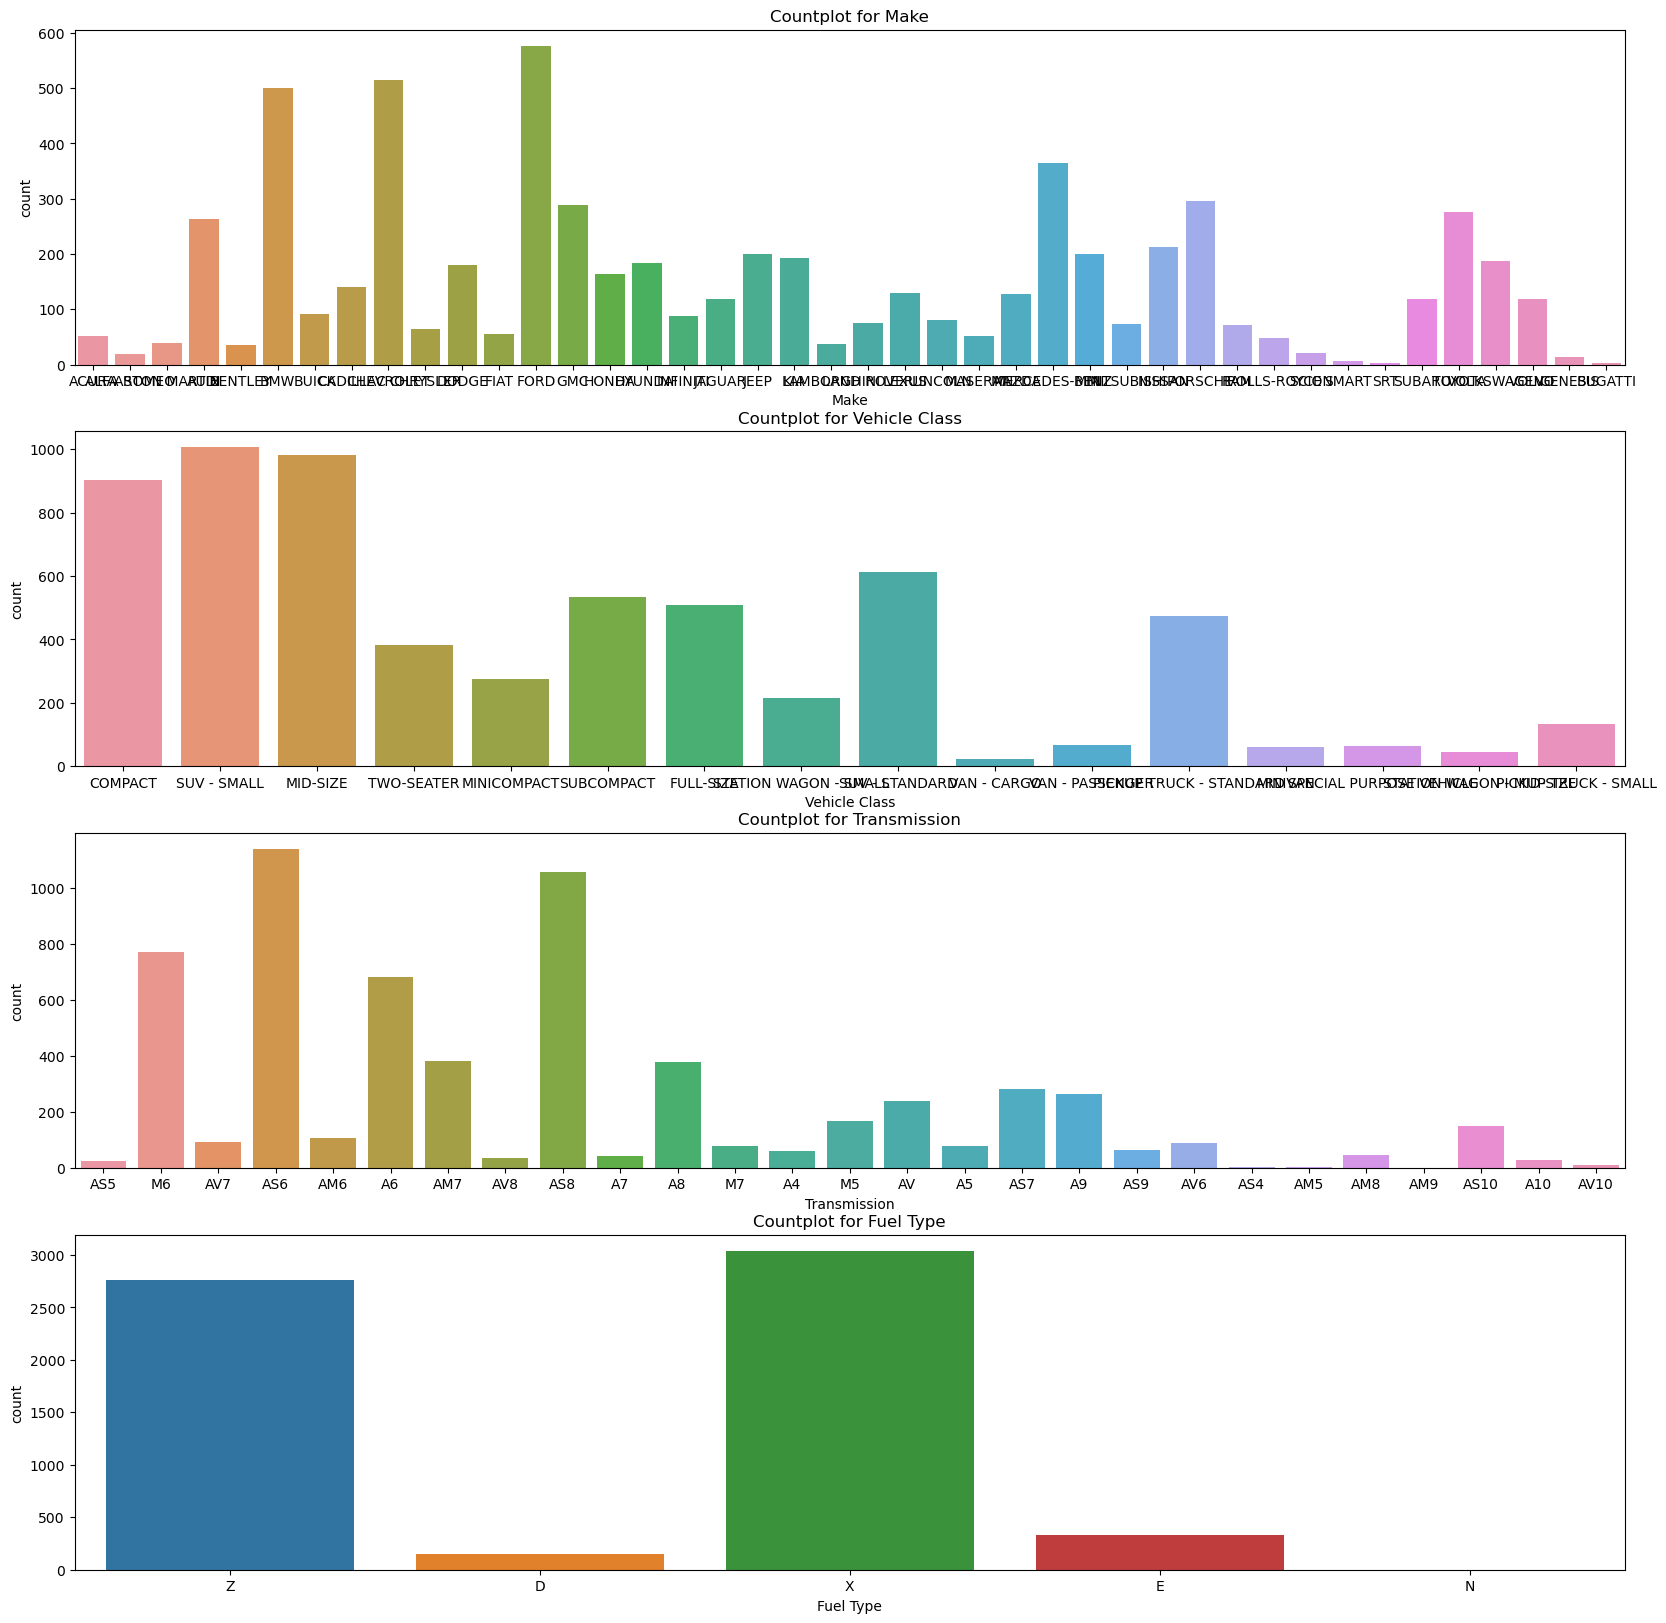

In [28]:
# for categorical features
#1. countplot
cols1=['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']
plt.figure(figsize=(20,20))
for i in range(len(cols1)):
    plt.subplot(4,1,i+1)
    sns.countplot(x=df[cols1[i]])
    plt.title(f'Countplot for {cols1[i]}')
plt.show()

C:\Users\win 8.1\AppData\Local\Temp\ipykernel_9768\3221052247.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


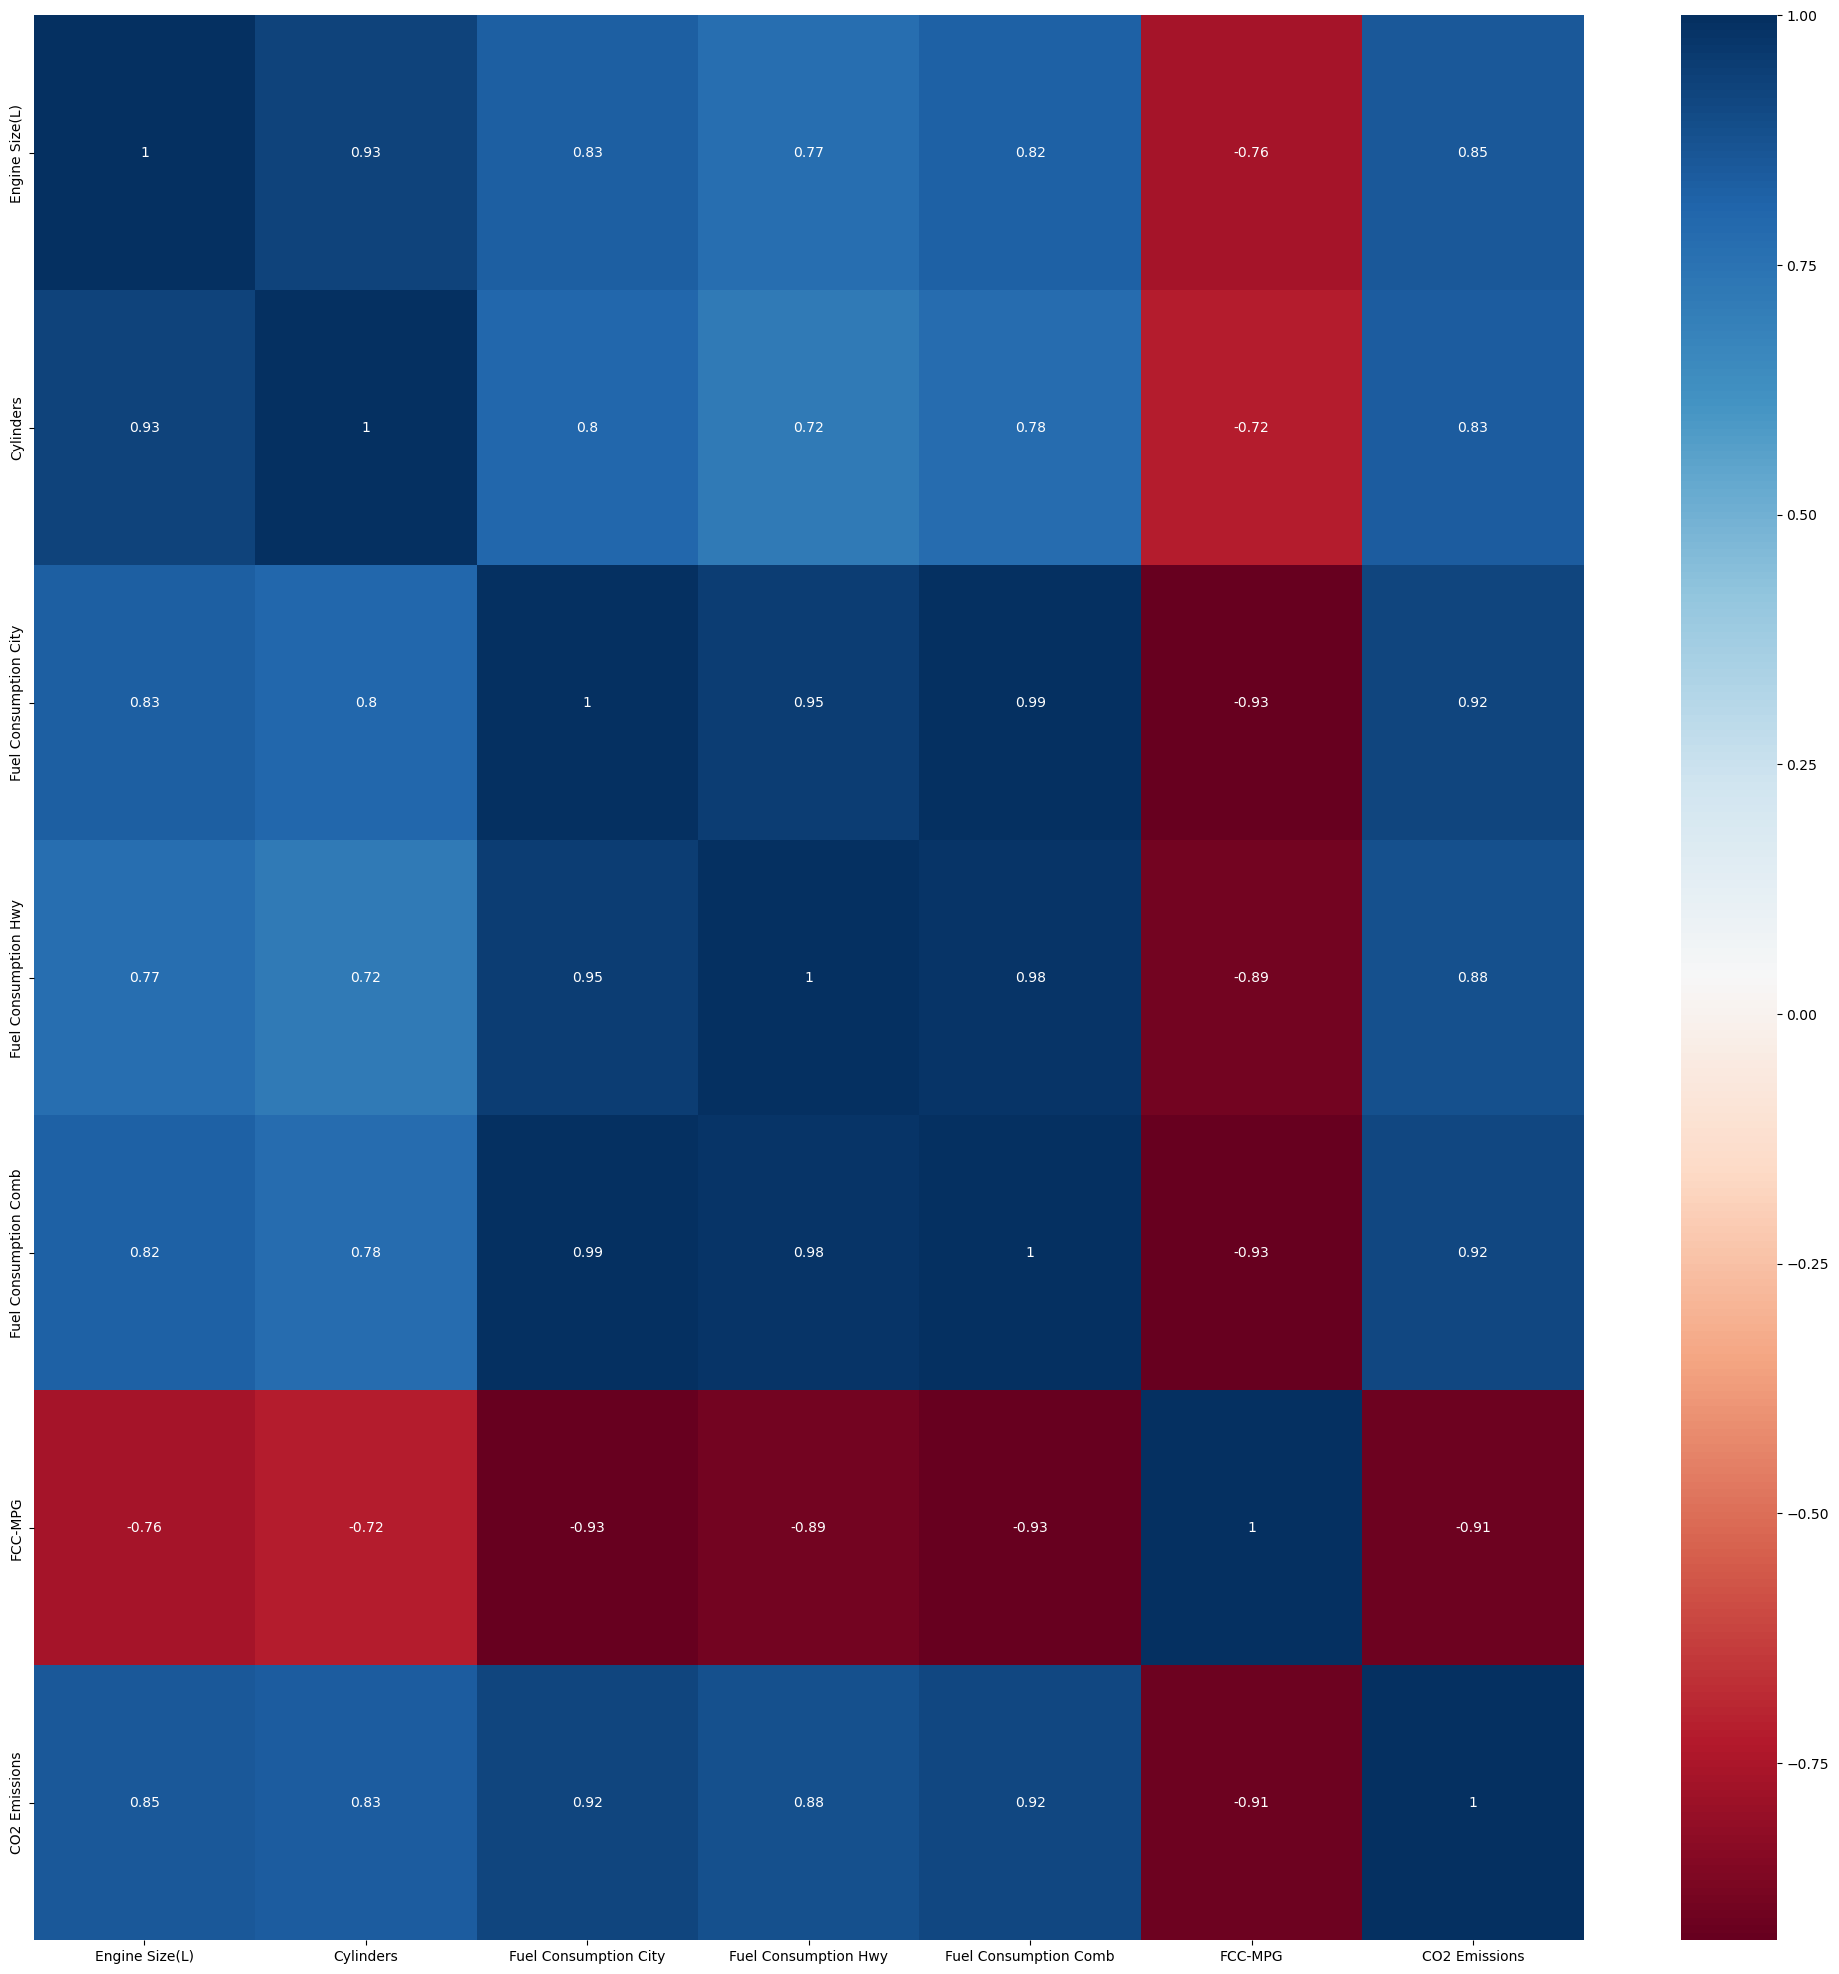

In [29]:
corr = df.corr()

plt.figure(figsize=(25,25))
sns.heatmap(corr[abs(corr)>=0.7],annot=True,cmap='RdBu')
plt.show()

In [30]:
s1  = df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T
s1 = s1.iloc[:,3:]
s1

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
Engine Size(L),0.9,1.4,1.4,1.4,1.5,3.0,6.000,6.200,6.2,6.600,8.4
Cylinders,3.0,3.0,4.0,4.0,4.0,6.0,8.000,8.000,12.0,12.000,16.0
Fuel Consumption City,4.2,5.5,6.9,7.6,8.0,12.1,19.595,20.500,21.5,22.300,30.6
Fuel Consumption Hwy,4.0,5.3,5.7,5.9,6.1,8.7,13.400,14.300,14.9,16.100,20.6
Fuel Consumption Comb,4.1,5.6,6.4,6.8,7.2,10.6,16.700,17.757,18.4,19.519,26.1
FCC-MPG,11.0,14.0,15.0,16.0,17.0,27.0,39.000,42.000,44.0,50.000,69.0
CO2 Emissions,96.0,131.0,147.0,161.0,170.0,246.0,356.000,377.570,390.0,414.000,522.0


In [33]:
lower_end_feat = ['Engine Size(L)','Fuel Consumption City','Fuel Consumption Hwy','Fuel Consumption Comb','FCC-MPG','CO2 Emissions']
upper_end_feat = ['Engine Size(L)','Cylinders','Fuel Consumption City','Fuel Consumption Hwy','Fuel Consumption Comb','FCC-MPG','CO2 Emissions']

In [34]:
def ol_treatment_upper_end(x):
    x = x.clip(upper = x.quantile(0.99))
    return x

def ol_treatment_lower_end(x):
    x = x.clip(lower = x.quantile(0.01))
    return x

In [35]:
df[lower_end_feat] = df[lower_end_feat].apply(ol_treatment_lower_end)
df[upper_end_feat] = df[upper_end_feat].apply(ol_treatment_upper_end)

In [36]:
s2  = df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T
s2 = s2.iloc[:,3:]
s2

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
Engine Size(L),1.4,1.4,1.4,1.4,1.5,3.0,6.000,6.200,6.2,6.60000,6.600
Cylinders,3.0,3.0,4.0,4.0,4.0,6.0,8.000,8.000,12.0,12.00000,12.000
Fuel Consumption City,5.5,5.5,6.9,7.6,8.0,12.1,19.595,20.500,21.5,22.30000,22.300
Fuel Consumption Hwy,5.3,5.3,5.7,5.9,6.1,8.7,13.400,14.300,14.9,16.10000,16.100
Fuel Consumption Comb,5.6,5.6,6.4,6.8,7.2,10.6,16.700,17.757,18.4,19.50361,19.519
FCC-MPG,14.0,14.0,15.0,16.0,17.0,27.0,39.000,42.000,44.0,50.00000,50.000
CO2 Emissions,131.0,131.0,147.0,161.0,170.0,246.0,356.000,377.570,390.0,414.00000,414.000


In [37]:
print(df.shape)
print(cat_cols)

(6282, 12)
Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')


In [38]:
df_dum = pd.get_dummies(df,columns=cat_cols,drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

(6282, 2145)
Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City',
       'Fuel Consumption Hwy', 'Fuel Consumption Comb', 'FCC-MPG',
       'CO2 Emissions', 'Make_ALFA ROMEO', 'Make_ASTON MARTIN', 'Make_AUDI',
       ...
       'Transmission_AV6', 'Transmission_AV7', 'Transmission_AV8',
       'Transmission_M5', 'Transmission_M6', 'Transmission_M7', 'Fuel Type_E',
       'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z'],
      dtype='object', length=2145)


In [39]:
print(df_dum.dtypes.value_counts())

uint8      2138
float64       4
int64         3
dtype: int64


In [41]:
from scipy.stats import jarque_bera
test_stat1, p1 = jarque_bera((df['CO2 Emissions']))
print('test_stat',test_stat1)
print('p',p1)

test_stat 242.41722703524158
p 2.2896441467609006e-53


C:\Users\win 8.1\AppData\Local\Temp\ipykernel_9768\49240490.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_dum['CO2 Emissions'])


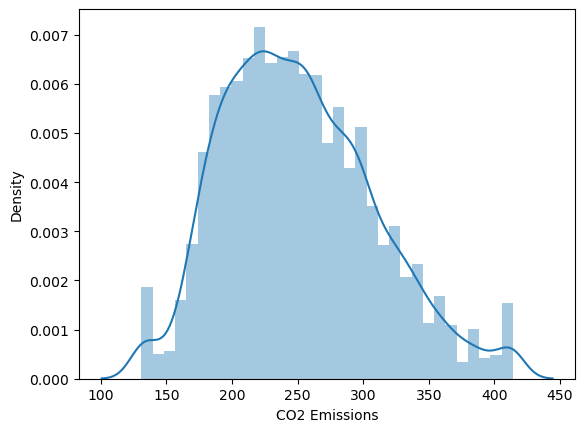

In [42]:
sns.distplot(df_dum['CO2 Emissions'])
plt.show()

In [43]:
test_stat1, p1 = jarque_bera(np.log(df['CO2 Emissions']))
print('test_stat',test_stat1)
print('p',p1)

test_stat 26.270067484189337
p 1.9748191328773865e-06


C:\Users\win 8.1\AppData\Local\Temp\ipykernel_9768\837390885.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_dum['CO2 Emissions']))


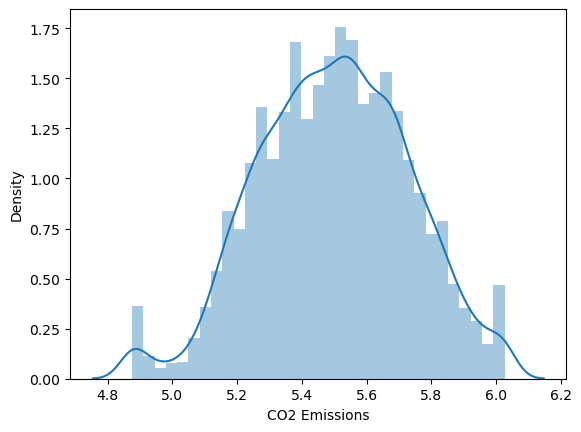

In [44]:
sns.distplot(np.log(df_dum['CO2 Emissions']))
plt.show()

In [45]:
x = df_dum.drop('CO2 Emissions',axis=1)
y = np.log(df_dum['CO2 Emissions'])
print(x.shape)
print(y.shape)

(6282, 2144)
(6282,)


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4711, 2144)
(1571, 2144)
(4711,)
(1571,)


In [48]:
#PCA

In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [50]:
sc = StandardScaler()

sc.fit(x_train)
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)
print(x_train_sc.shape)
print(x_test_sc.shape)

(4711, 2144)
(1571, 2144)


In [51]:
pca = PCA()
pca.fit(x_train_sc)

x_train_pcomps = pca.transform(x_train_sc)
x_test_pcomps = pca.transform(x_test_sc)
print(x_train_pcomps.shape)
print(x_test_pcomps.shape)

(4711, 2144)
(1571, 2144)


In [52]:
eig_val = pca.explained_variance_
eig_df = pd.DataFrame({'Variance(Eig_val)':eig_val,
                      'EVR':pca.explained_variance_ratio_*100})
eig_df.head()

,Variance(Eig_val),EVR
0,7.777919,0.402290
1,4.649251,0.240469
2,3.247922,0.167989
3,2.997631,0.155044
4,2.877401,0.148825


In [53]:
eig_df['CumSum_EVR'] = np.cumsum(eig_df['EVR'])
eig_df.head(10)

,Variance(Eig_val),EVR,CumSum_EVR
0,7.777919,0.402290,0.402290
1,4.649251,0.240469,0.642759
2,3.247922,0.167989,0.810748
3,2.997631,0.155044,0.965792
4,2.877401,0.148825,1.114617
5,2.819870,0.145850,1.260467
6,2.807992,0.145235,1.405702
7,2.748510,0.142159,1.547861
8,2.678662,0.138546,1.686406
9,2.571746,0.133016,1.819423


In [55]:
w = eig_df[eig_df['CumSum_EVR']<76]
w.tail(10)

,Variance(Eig_val),EVR,CumSum_EVR
1372,1.000425,0.051744,75.509375
1373,1.000425,0.051744,75.561119
1374,1.000425,0.051744,75.612863
1375,1.000425,0.051744,75.664607
1376,1.000425,0.051744,75.716351
1377,1.000425,0.051744,75.768096
1378,1.000425,0.051744,75.819840
1379,1.000425,0.051744,75.871584
1380,1.000425,0.051744,75.923328
1381,1.000425,0.051744,75.975072


In [ ]:
#Selecting 1372 PCs allows us to retain 75% of varaince

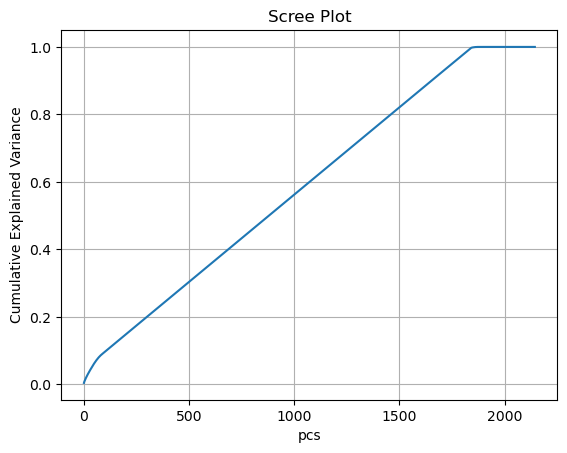

In [59]:
#scree plot
plt.plot(list(range(1,2145)),np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('pcs')
plt.grid()
plt.show()

In [78]:
pc_cols = []
for i in range(1,2145):
    s = 'PC'+ str(i)
    pc_cols.append(s)
print(len(pc_cols))

2144


In [79]:
x_train_pcomps_df = pd.DataFrame(x_train_pcomps,columns = pc_cols)
print(x_train_pcomps_df.shape)
x_train_pcomps_df.head()

(4711, 2144)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC2135,PC2136,PC2137,PC2138,PC2139,PC2140,PC2141,PC2142,PC2143,PC2144
0,1.003543,-3.003472,0.747737,-2.174416,3.581817,0.895513,-3.112405,0.540883,-0.956098,2.139177,...,6.036543e-28,-4.635590e-28,-5.338740e-28,-3.376089e-28,2.648163e-28,-4.917426e-28,4.520839e-28,1.768042e-29,7.127541e-28,2.118076e-28
1,6.271223,2.042998,-2.751328,-2.440917,-4.332750,0.040786,-1.394980,0.843226,2.806200,0.603508,...,-5.067475e-16,-1.320424e-16,2.889746e-15,2.304332e-15,3.010256e-16,2.208011e-15,1.079398e-15,-1.531198e-15,3.118708e-15,-9.254901e-16
2,-1.769000,2.748809,-1.780302,4.427101,1.961355,0.991892,-1.784683,-1.289622,-0.208545,-0.052350,...,-2.004748e-27,1.516545e-27,2.024198e-27,3.564809e-27,-1.307413e-27,-1.549767e-27,-5.498883e-27,3.937833e-28,-7.793805e-28,3.234139e-27
3,-5.156578,-1.088169,0.288752,1.362602,-1.194003,-0.357699,0.618010,0.225448,-0.231585,4.386719,...,1.112647e-16,-5.666592e-16,2.085850e-26,4.699232e-26,5.163021e-27,1.457458e-26,-1.642661e-26,-3.464992e-26,-7.659725e-28,6.229047e-27
4,0.949331,-2.483724,0.555264,0.858561,-0.212380,-1.056066,2.230519,0.147258,-0.873464,-0.837721,...,-6.107892e-29,-7.296577e-28,1.030840e-27,-5.609316e-28,-4.970062e-28,2.021767e-27,-5.824033e-29,9.117327e-28,-2.203291e-28,1.282632e-27


In [80]:
x_test_pcomps_df = pd.DataFrame(x_test_pcomps,columns = pc_cols)
print(x_test_pcomps_df.shape)
x_test_pcomps_df.head()

(1571, 2144)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC2135,PC2136,PC2137,PC2138,PC2139,PC2140,PC2141,PC2142,PC2143,PC2144
0,1.682851,1.071542,-1.865526,5.078073,2.106394,-0.183905,-1.389171,-0.744561,0.160038,0.563182,...,-8.890034e-16,1.430457e-15,1.354663e-15,3.506931e-15,1.672332e-15,-6.389317e-16,-3.992283e-15,-2.248283e-15,-2.256569e-15,1.009999e-15
1,0.387671,3.327709,-1.013107,-1.510570,-0.350040,0.669446,1.780353,1.159779,1.124387,0.150053,...,6.313729e-16,9.922345e-16,1.353196e-16,6.757270e-16,2.607882e-15,-9.109667e-17,-2.151910e-15,1.610146e-16,3.593510e-15,-8.090482e-16
2,1.324522,-1.533280,-0.771473,-0.893389,0.302992,-1.206372,-0.763347,0.314838,1.779005,0.581029,...,1.255500e-15,-2.819461e-15,1.114426e-15,-3.177565e-15,2.806877e-16,-1.017272e-15,-1.234484e-15,4.611593e-15,-1.557187e-15,1.401972e-15
3,0.373201,-1.919061,0.028896,1.771303,-1.571275,-2.271552,0.352865,3.308039,-1.063295,-1.848740,...,7.028568e-16,1.510562e-16,-2.097252e-16,2.031705e-16,-6.685205e-17,1.199912e-15,2.621253e-15,2.959216e-15,2.424232e-15,2.599233e-15
4,0.224125,3.177369,-0.171635,-1.461761,1.073048,0.016755,0.755000,-0.745301,-1.891332,-0.733357,...,1.084815e-26,7.810888e-27,1.523838e-27,-6.335467e-30,3.356036e-27,3.365717e-27,-3.344598e-27,1.369790e-27,-2.976631e-27,1.870861e-27


In [81]:
x_train_pcomps_df = x_train_pcomps_df.iloc[:,:1372]
print(x_train_pcomps_df.shape)
x_train_pcomps_df.head()

(4711, 1372)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC1363,PC1364,PC1365,PC1366,PC1367,PC1368,PC1369,PC1370,PC1371,PC1372
0,1.003543,-3.003472,0.747737,-2.174416,3.581817,0.895513,-3.112405,0.540883,-0.956098,2.139177,...,-1.139839e-12,-4.642636e-14,5.106143e-13,-3.113413e-13,-2.654383e-13,-2.165914e-13,-9.002067e-13,4.262550e-13,1.214909e-13,-1.015971e-13
1,6.271223,2.042998,-2.751328,-2.440917,-4.332750,0.040786,-1.394980,0.843226,2.806200,0.603508,...,1.414667e+00,-7.742132e-01,1.568362e+00,-1.101806e+00,-6.524057e-01,-5.807816e+00,1.556296e+00,-1.995663e+00,3.428359e-01,-5.995886e-01
2,-1.769000,2.748809,-1.780302,4.427101,1.961355,0.991892,-1.784683,-1.289622,-0.208545,-0.052350,...,-5.842073e-12,-6.127785e-12,2.730137e-12,-1.337932e-12,-2.023317e-12,-1.068499e-11,-5.409154e-12,1.868662e-12,-5.805641e-12,2.876479e-12
3,-5.156578,-1.088169,0.288752,1.362602,-1.194003,-0.357699,0.618010,0.225448,-0.231585,4.386719,...,-9.303379e-12,-2.769867e-11,-2.153310e-12,-3.402298e-11,-3.887125e-11,-3.995056e-12,-2.422552e-11,4.953394e-12,1.236028e-11,1.024603e-11
4,0.949331,-2.483724,0.555264,0.858561,-0.212380,-1.056066,2.230519,0.147258,-0.873464,-0.837721,...,6.419640e-13,-1.097595e-14,8.680764e-14,3.775543e-14,1.261177e-12,-2.849354e-13,-2.139872e-13,1.766224e-12,1.551980e-13,-4.682592e-13


In [82]:
x_test_pcomps_df = x_test_pcomps_df.iloc[:,:1372]
print(x_test_pcomps_df.shape)
x_test_pcomps_df.head()

(1571, 1372)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC1363,PC1364,PC1365,PC1366,PC1367,PC1368,PC1369,PC1370,PC1371,PC1372
0,1.682851,1.071542,-1.865526,5.078073,2.106394,-0.183905,-1.389171,-0.744561,0.160038,0.563182,...,-1.283492e+00,-4.468792e+00,-9.515520e-01,-1.278223e+00,-7.045126e+00,-6.142943e-01,-2.545056e-01,-4.012507e+00,-1.651737e+00,-2.603552e+00
1,0.387671,3.327709,-1.013107,-1.510570,-0.350040,0.669446,1.780353,1.159779,1.124387,0.150053,...,-3.411984e+00,1.195883e+00,-8.848886e-01,9.615356e-01,2.660569e+00,-2.705822e+00,-2.051091e+00,-4.977822e+00,-4.306698e-01,-1.912365e+00
2,1.324522,-1.533280,-0.771473,-0.893389,0.302992,-1.206372,-0.763347,0.314838,1.779005,0.581029,...,-3.343874e+00,-1.362134e+00,-2.283225e+00,1.720414e+00,-9.321650e-01,2.532055e+00,-1.767708e+00,-5.604784e+00,4.924139e-01,7.695891e-01
3,0.373201,-1.919061,0.028896,1.771303,-1.571275,-2.271552,0.352865,3.308039,-1.063295,-1.848740,...,1.970562e-01,-5.399702e-01,2.209043e+00,-5.229729e-01,-2.575549e+00,5.504852e-01,-2.984490e+00,5.435114e-01,-2.970521e+00,-2.507942e+00
4,0.224125,3.177369,-0.171635,-1.461761,1.073048,0.016755,0.755000,-0.745301,-1.891332,-0.733357,...,-1.682463e-12,5.011455e-12,2.098763e-12,2.843031e-12,-2.398596e-12,-7.643606e-13,5.218240e-13,-5.517601e-12,-1.040668e-11,-7.740276e-12


In [83]:
print(x_train_pcomps_df.shape)
print(x_test_pcomps_df.shape)
print(y_train.shape)
print(y_test.shape)

(4711, 1372)
(1571, 1372)
(4711,)
(1571,)


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [69]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2 = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2)

In [70]:
# Linear Regression after PCA
lr2 = LinearRegression()
lr2.fit(x_train_pcomps_df,y_train)

LinearRegression()

In [84]:
print('Train Score', lr2.score(x_train_pcomps_df,y_train))
print('Test Score', lr2.score(x_test_pcomps_df,y_test))

Train Score 0.981330845375886
Test Score 0.954127569483879


In [85]:
ypred_lr2 = lr2.predict(x_test_pcomps_df) 
eval_model(y_test,ypred_lr2)

MAE 0.03440570899705612
MSE 0.0025269966979559457
RMSE 0.05026924206665489
R2_Score 0.954127569483879


In [86]:
print(x_train.shape)
print(len(pc_cols))

(4711, 2144)
2144


In [87]:
loadings_matrix = pd.DataFrame(pca.components_.T*np.sqrt(pca.explained_variance_),
                               index=x_train.columns,columns=pc_cols)
loadings_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC2135,PC2136,PC2137,PC2138,PC2139,PC2140,PC2141,PC2142,PC2143,PC2144
Engine Size(L),0.882837,-0.030125,-0.032683,0.057133,-0.151167,0.102337,-0.095667,-0.004960,0.058385,0.070640,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
Cylinders,0.863232,0.109784,-0.056183,0.023907,-0.135528,0.084727,-0.120468,0.001664,0.085538,0.072732,...,4.079036e-47,3.621232e-47,-3.632085e-47,-3.483886e-47,-9.781052e-48,4.853539e-47,1.220069e-47,4.350712e-47,2.012353e-47,-1.307239e-47
Fuel Consumption City,0.965008,-0.095576,-0.023077,-0.034050,-0.004831,-0.026784,0.015705,-0.001673,0.064827,-0.025819,...,3.189061e-46,-7.484613e-46,-1.541534e-46,-4.625664e-46,4.071243e-46,1.865642e-46,-7.418133e-46,2.931724e-48,5.081312e-46,2.877449e-47
Fuel Consumption Hwy,0.929599,-0.189061,0.020694,0.027622,0.058551,-0.058176,0.046324,-0.011028,0.069919,0.056625,...,3.360098e-47,-5.329062e-46,1.389906e-46,-2.074028e-46,2.242899e-46,1.914386e-46,-3.246561e-46,6.651874e-47,3.722095e-46,1.474956e-48
Fuel Consumption Comb,0.963392,-0.128724,-0.007324,-0.012653,0.016890,-0.036828,0.026572,-0.004806,0.067899,0.002928,...,-5.182951e-46,1.309279e-45,-1.086345e-46,6.250529e-46,-6.699945e-46,-4.857752e-46,1.053713e-45,-1.561499e-46,-7.852377e-46,-5.120057e-47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Transmission_M7,0.038138,0.205308,0.522941,0.009007,-0.077414,-0.117242,-0.080519,-0.017026,0.079557,0.072262,...,-5.914228e-47,-2.679132e-48,1.320305e-46,1.084967e-46,-7.661696e-48,1.941240e-46,-1.095829e-46,-2.459413e-47,-4.110444e-49,1.425298e-48
Fuel Type_E,0.388809,-0.297107,0.054265,-0.049130,0.139993,-0.007136,0.081529,-0.044277,-0.040701,-0.049826,...,2.688285e-47,1.188560e-46,-3.605369e-47,-3.305260e-47,3.056277e-47,2.657247e-47,2.916783e-47,4.881128e-47,3.760162e-47,-1.394556e-47
Fuel Type_N,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
Fuel Type_X,-0.407002,-0.738946,0.048994,0.032143,-0.114723,0.011782,-0.078351,0.028658,0.133313,-0.007546,...,-3.247166e-47,1.008502e-46,-1.586018e-46,-6.467362e-47,1.586106e-47,-2.673351e-48,7.256866e-47,3.116454e-47,6.708959e-47,-1.587391e-47


In [88]:
from sklearn.linear_model import Ridge, Lasso

In [89]:
rid1 = Ridge(alpha = 0.7)  # alpha is a hyperparameter
rid1.fit(x_train_pcomps_df,y_train)

Ridge(alpha=0.7)

In [90]:
print('Train Score',rid1.score(x_train_pcomps_df,y_train))  # R2 Score
print('Test Score',rid1.score(x_test_pcomps_df,y_test))     # R2 Score

Train Score 0.9813308438085295
Test Score 0.9541275303590672
